## <center> ONLINE FOOD DATASET. </center>

##### IMPORT LIBRARY PACKAGES

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always') 

# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

##### LOAD DATASET

In [22]:
online_food = pd.read_csv('onlinefoods.csv') 

##### DISPLAY THE DATASET

In [23]:
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


##### DATA CLEANING

In [24]:
online_food.drop (columns=['Unnamed: 12'], inplace = True)

online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


##### DATA OVERVIEW

###### CHECK THE NUMBER OF ROWS AND COLUMNS.

In [25]:
print('The total number of rows and columns is',online_food.shape,'respectively.')

The total number of rows and columns is (388, 12) respectively.


###### CHECK FOR THE COLUMNS IN THIS DATA.

In [26]:
online_food.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [27]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


###### CHECK FOR MISSING VALUES

In [28]:
online_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [29]:
online_food.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [30]:
online_food.boxplot()

<AxesSubplot: >

##### EXPLORATORY DATA ANALYSIS, (E.D.A)

###### CHECK THE UNIQUE VALUES IN THE AGE COLUMN.

In [39]:
online_food['Age'].unique()
online_food['Age'].value_counts()

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64

In [41]:
# Columns to exclude from the loop
exclude_columns = ['latitude', 'longitude', 'Pin code']

# Loop through each column
for column in online_food.columns:
    # Skip excluded columns
    if column in exclude_columns:
        continue
    
    # Get unique values and their counts
    unique_values = online_food[column].unique()
    value_counts = online_food[column].value_counts()
    
    # Print column name
    print(f"Column: {column}")
    
    # Print unique values and their counts
    print("Unique values:")
    print(unique_values)
    print("Value counts:")
    print(value_counts)
    print("\n")

Column: Age
Unique values:
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Value counts:
Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64


Column: Gender
Unique values:
['Female' 'Male']
Value counts:
Gender
Male      222
Female    166
Name: count, dtype: int64


Column: Marital Status
Unique values:
['Single' 'Married' 'Prefer not to say']
Value counts:
Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64


Column: Occupation
Unique values:
['Student' 'Employee' 'Self Employeed' 'House wife']
Value counts:
Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64


Column: Monthly Income
Unique values:
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Value counts:
Monthly Income
No Income         

In [37]:
# Display unique values and value counts for each column
for column in online_food.columns:
    print(f"Column: {column}")
    print("Unique values:")
    print(online_food[column].unique())
    print("Value counts:")
    print(online_food[column].value_counts())
    print("\n")

Column: Age
Unique values:
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Value counts:
Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64


Column: Gender
Unique values:
['Female' 'Male']
Value counts:
Gender
Male      222
Female    166
Name: count, dtype: int64


Column: Marital Status
Unique values:
['Single' 'Married' 'Prefer not to say']
Value counts:
Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64


Column: Occupation
Unique values:
['Student' 'Employee' 'Self Employeed' 'House wife']
Value counts:
Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64


Column: Monthly Income
Unique values:
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Value counts:
Monthly Income
No Income         

In [42]:
# Columns to exclude from the loop
exclude_columns = ['latitude', 'longitude', 'Pin code']

# Loop through each column
for column in online_food.columns:
    # Skip excluded columns
    if column in exclude_columns:
        continue
    
    # Get unique values and their counts
    value_counts = online_food[column].value_counts()
    
    # Create bar chart
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, 
                 labels={'x': column, 'y': 'Count'}, 
                 title=f"Value Counts for {column}")
    
    # Show plot
    fig.show()

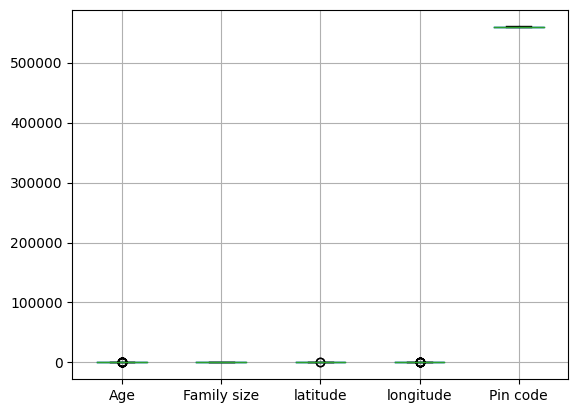

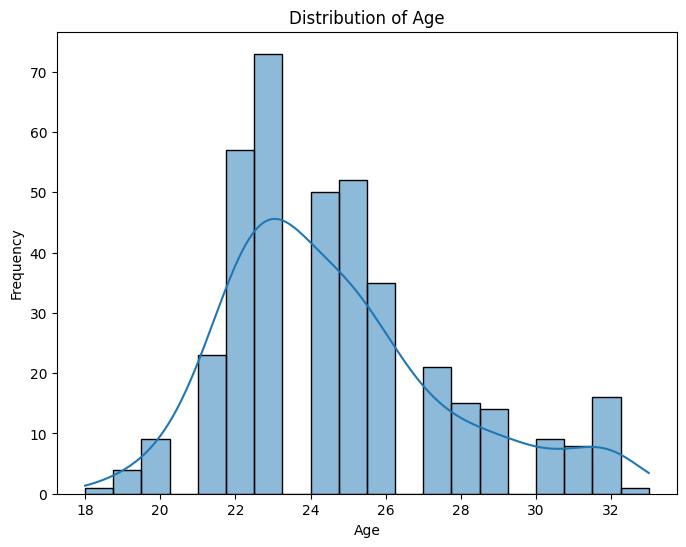

In [31]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(online_food['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

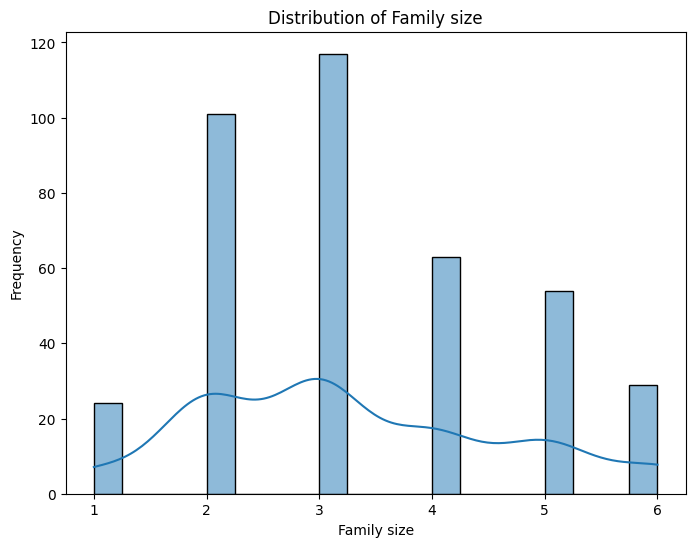

In [32]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(online_food['Family size'], bins=20, kde=True)
plt.title('Distribution of Family size')
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.show()

In [33]:
online_food.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object